### Hypothesis testing
#### Mini project II
Elements of Data Science

In [28]:
import numpy as np
from datascience import *

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Fix for datascience plots
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

## Hypothesis Testing

#### Create differences Test statistic 


In [ ]:
def diff_n(values, n):
    return np.array(values)[n:] - np.array(values)[:-n]

In [ ]:
positive = np.count_nonzero(diff_n(make_array(1.0, 1.5,1.4, 1.2, 2.0, 1.8), 2)>0)
positive

In [ ]:
negative = np.count_nonzero(diff_n(make_array(1.0, 1.5,1.4, 1.2, 2.0, 1.8), 2) < 0)
negative

In [ ]:
positive - negative

In [ ]:
def changes(rates, years = 1):
    "Return the number of increases minus the number of decreases after two years."
    differences = diff_n(rates, years)  
    positives = np.count_nonzero(differences > 0)
    negatives = np.count_nonzero(differences < 0) 
    return positives - negatives  

### Inference and biodiversity recovery

In [30]:
# Plot description dataset
datafile = "../Mini-II/data/MSH_PLOT_DESCRIPTORS2.csv"
MSH_PLOT = Table.read_table(datafile)
MSH_PLOT

PLOT_NAME,PLOT_CODE,FIRST_YEAR,LAST_YEAR,UTMGRID,UTMEAST,UTMNORTH,LONG,LAT,POT._RAD.,HEAT_LOAD,ELEVATION(M),ASPECT,SLOPE,IMPACT_TYPE,SUCCESSION_TYPE
Toutle Ridge10,TORD10,1981,1996,10T,559724,5118180,122.226,46.2146,0.769,0.796,1430,N,11,Blast edge,Secondary
Toutle Ridge09,TORD09,1981,1997,10T,559599,5118216,122.227,46.2149,0.722,0.827,1417,NW,18,Blast edge,Secondary
Toutle Ridge08,TORD08,1981,1997,10T,559565,5118281,122.228,46.2155,0.788,0.833,1401,NNW,10,Blast edge,Secondary
Toutle Ridge07,TORD07,1981,1997,10T,559466,5118302,122.229,46.2157,0.756,0.786,1379,N,12,Blast edge,Secondary
Toutle Ridge06,TORD06,1981,1997,10T,559413,5118329,122.23,46.2159,0.835,0.877,1365,NW,7,Blast edge,Secondary
Toutle Ridge05,TORD05,1981,1997,10T,559342,5118366,122.231,46.2163,0.822,0.854,1352,NNW,7,Blast edge,Secondary
Toutle Ridge04,TORD04,1981,1997,10T,559279,5115125,122.232,46.1871,0.764,0.818,1340,NNW,12,Blast edge,Secondary
Toutle Ridge03,TORD03,1981,1997,10T,559238,5118483,122.232,46.2173,0.764,0.818,1320,NNW,12,Blast edge,Secondary
Toutle Ridge02,TORD02,1981,1997,10T,559091,5118480,122.234,46.2173,0.861,0.9,1294,WNW,6,Blast edge,Secondary
Toutle Ridge01,TORD01,1981,1997,10T,558992,5118569,122.235,46.2181,0.874,0.9,1280,WNW,4,Blast edge,Secondary


In [32]:
np.unique(MSH_PLOT['PLOT_CODE'])

array(['ABPL01', 'ABPL02', 'ABPL03', 'ABPL04', 'ABPL05', 'ABPL06',
       'ABPL07', 'ABPL08', 'ABPL09', 'ABPL10', 'BUCA01', 'BUCA03',
       'BUCA04', 'BUCB01', 'BUCB02', 'BUCB03', 'BUCB04', 'BUCB05',
       'BUCB06', 'BUCB07', 'BUCC01', 'BUCC02', 'BUCC03', 'BUCD01',
       'BUCD02', 'BUCD03', 'BUCD05', 'LAH04', 'LAH05', 'LAH06', 'LAH07',
       'LAH08', 'LAHR01', 'LAHR02', 'PICA01', 'PICA02', 'PICA03', 'PICA04',
       'PICB01', 'PICB02', 'PICB03', 'PICB04', 'PICB05', 'PICE02',
       'PICE03', 'PICE04', 'PUPL01', 'PUPL02', 'PUPL03', 'PUPL04',
       'PUPL05', 'PUPL06', 'PUPL07', 'PUPL08', 'PUPL09', 'PUPL10',
       'PUPL11', 'PUPL12', 'SFTR01', 'SFTR02', 'SFTR03', 'SFTR04',
       'STRD01', 'STRD02', 'STRD03', 'STRD04', 'STRD05', 'STRD06',
       'STRD07', 'STRD08', 'STRD09', 'STRD10', 'STRD11', 'STRD12',
       'STRD13', 'STRD14', 'STRD15', 'STRD16', 'STRD17', 'STRD18',
       'STRD19', 'STRD20', 'TORD01', 'TORD02', 'TORD03', 'TORD04',
       'TORD05', 'TORD06', 'TORD07', 'TORD08', 

In [33]:
MSH_PLOT = MSH_PLOT.with_columns('NLONG',-1*(MSH_PLOT.column('LONG')))
MSH_map = MSH_PLOT.select('LAT', 'NLONG', 'PLOT_CODE').relabel('PLOT_CODE', 'labels')
Circle.map_table(MSH_map, color='blue',area=200)

In [34]:
datafile = "../Mini-II/data/MSH_STRUCTURE_PLOT_YEAR.csv"
MSH_YEAR = Table.read_table(datafile)
MSH_YEAR

PLOT_ID,PLOT_NAME,PLOT_NUMBER,YEAR,RICHNESS,COVER_%,HPRIME,EVENNESS,FREQUENCY
ABPL011995,ABPL,1,1995,14,2.2,2.41,0.913,7.7
ABPL011996,ABPL,1,1996,17,2.9,2.524,0.891,8.1
ABPL011997,ABPL,1,1997,18,4.2,2.231,0.772,11.6
ABPL011999,ABPL,1,1999,19,5.9,2.268,0.77,14.2
ABPL012000,ABPL,1,2000,17,6.2,2.111,0.745,9.1
ABPL012001,ABPL,1,2001,16,20.3,1.721,0.621,11.3
ABPL012002,ABPL,1,2002,13,7.2,1.715,0.669,14.5
ABPL012003,ABPL,1,2003,13,6.1,2.008,0.783,17.7
ABPL012004,ABPL,1,2004,12,6.3,1.826,0.735,18.9
ABPL012005,ABPL,1,2005,8,4.9,1.491,0.717,20.8


In [35]:
np.unique(MSH_YEAR['PLOT_NAME'])

array(['ABPL', 'BUCA', 'BUCB', 'BUCC', 'BUCD', 'LAHR', 'PICA', 'PICB',
       'PICE', 'PUPL', 'SFTR', 'STRD', 'TORD'],
      dtype='<U4')

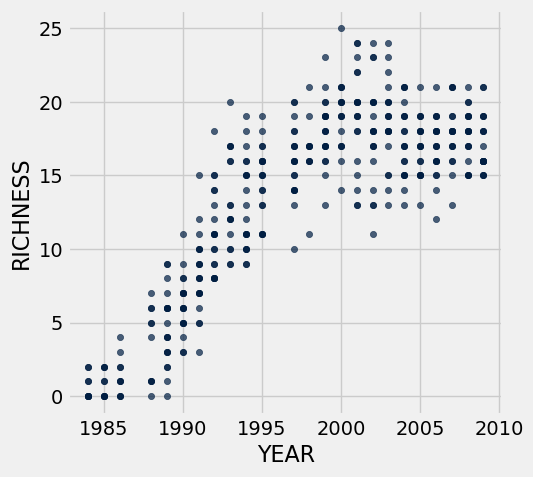

In [38]:
MSH_YEAR.where('PLOT_NAME','STRD').scatter("YEAR","RICHNESS")

In [39]:
MSH_YEAR.where('PLOT_NAME','STRD').group("YEAR",np.mean)

YEAR,PLOT_ID mean,PLOT_NAME mean,PLOT_NUMBER mean,RICHNESS mean,COVER_% mean,HPRIME mean,EVENNESS mean,FREQUENCY mean
1984,,,5.5,0.6,0.06,0.1386,0.2,1.1
1985,,,5.5,0.8,0.08,0.2079,0.3,0.85
1986,,,5.5,1.4,0.28,0.3871,0.4,3.23
1988,,,5.5,3.6,1.45,0.9923,0.5882,9.66
1989,,,10.5,4.7,3.295,1.2956,0.82585,3.51
1990,,,10.5,6.25,1.435,1.6168,0.919,3.605
1991,,,10.5,8.3,3.11,1.79715,0.88635,3.87
1992,,,10.5,11.15,4.71,2.0761,0.87865,4.43
1993,,,8.5,13.375,6.40625,2.11463,0.830813,7.1
1994,,,10.5,13.1,7.435,2.11255,0.83115,8.25


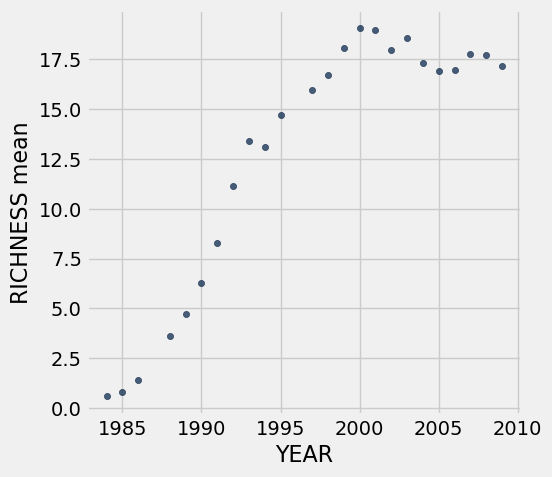

In [53]:
MSH_YEAR.where('PLOT_NAME','STRD').group("YEAR",np.mean).scatter("YEAR", "RICHNESS mean")

In [ ]:
MSH_YEAR.where('PLOT_NAME','STRD').scatter('YEAR','RICHNESS')

In [41]:
def simulate_under_null(num_chances_to_change):
    uniform = Table().with_columns(
        "Change", make_array('Increase', 'Decrease'),
        "Chance", make_array(0.5,        0.5))
    sample = uniform.sample_from_distribution('Chance', num_chances_to_change)     
    increases = sample.column("Chance sample").item(0) 
    decreases = sample.column("Chance sample").item(1)  
    return increases - decreases  

In [47]:
def empirical_distribution(tbl,iterations):
    num_changes = tbl.num_rows 
    samples = make_array()
    for i in np.arange(iterations):
        samples = np.append(samples, simulate_under_null(num_changes)) 
    Table().with_column('Test statistic under null', samples).hist(bins=np.arange(min(samples), max(samples) + max(samples) , 2))
    return samples

array([-6.,  2., -2., ...,  6.,  2., -8.])

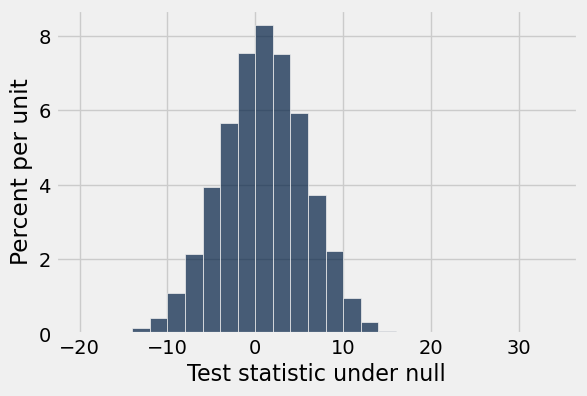

In [51]:
empirical_distribution(MSH_YEAR.where('PLOT_NAME','STRD').group("YEAR",np.mean),10000)

array([ -9.,  29.,  23., ..., -35.,   7.,  17.])

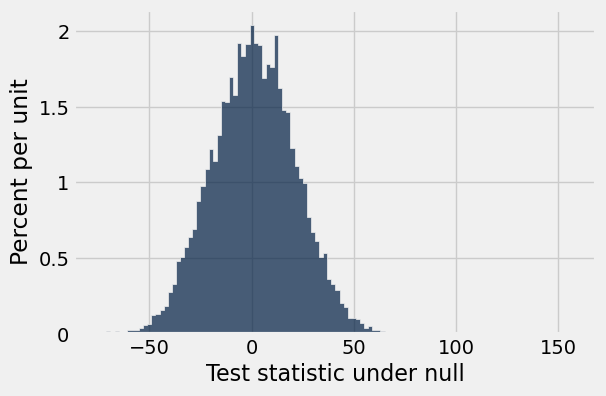

In [49]:
empirical_distribution(MSH_YEAR.where('PLOT_NAME','STRD'),10000)